# Рабочая тетрадь № 6

## Задание 1
### Вариант 1

Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.
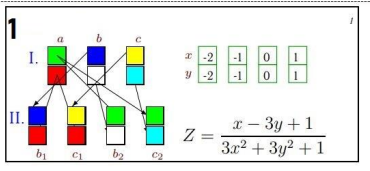

In [12]:
def qZ(x, y):
    return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)

def qSumZ(Z):
    return sum (Z)

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X, Y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId 

def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X. pop(minId)
    Y. pop(minId)
    Z. pop(minId)

    return X, Y, Z

def evoSteps(X, Y, stepsNum = 4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X, Y, arrZ)

        X, Y = exchangeScheme(X, Y, sorting(Z))

        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

In [14]:
X = [-2, -1, 0, 1]
Y = [-2, -1, 0, 1]

results = evoSteps(X, Y)

for i in range(len(results[2])):
    print(f'max_{i + 1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ += results[2][i][3]

print(f'max Z:       {max(qualityArrZ)}')

max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:       1.0


## Задание 2
### Вариант 1

Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже.
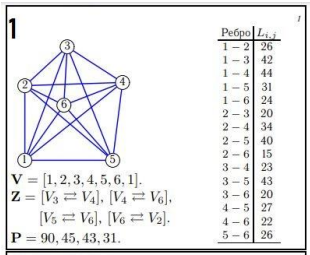

In [3]:
import networkx as nx
from math import e

distances = [(1, 2, 26),
            (1, 3, 42),
            (1, 4, 44),
            (1, 5, 31),
            (1, 6, 24),
            (2, 3, 20),
            (2, 4, 34),
            (2, 5, 40),
            (2, 6, 15),
            (3, 4, 23),
            (3, 5, 43),
            (3, 6, 20),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] 

V = [1, 2, 3, 4, 5, 6, 1] 
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (6, 2)] 
P = [90, 45, 43, 31] 

T = 100 

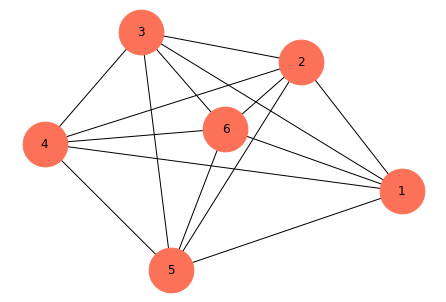

In [4]:
def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

In [5]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
            for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])
    

def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))

        return sum(edges)


def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV


def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i]) 
        newS = routeLength(newV, distances) 
        arrSum.append(newS)
        deltaS = newS - sumLength 

        if deltaS > 0:
            p = probability(deltaS, T) 

            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T)

    return V, arrSum


def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)

    graph = nx.Graph()

    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 5, 4, 6, 3, 2, 1]
Длина лучшего выбранного маршрута: 31
Длины всех рассмотренных маршрутов: [26, 26, 26, 26, 31]


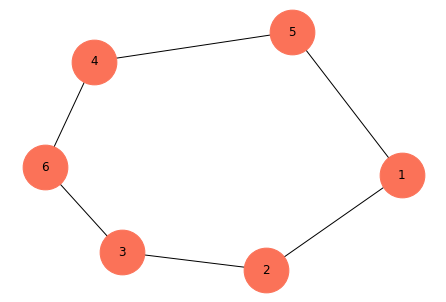

In [6]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)

## Задание 2*

На решенном уже примере поэкспериментируйте с показателем S,
проанализируйте результаты.

In [7]:
distances = [(1, 2, 31),
            (1, 3, 34),
            (1, 4, 41),
            (1, 5, 18),
            (1, 6, 42),
            (2, 3, 20),
            (2, 4, 35),
            (2, 5, 24),
            (2, 6, 15),
            (3, 4, 23),
            (3, 5, 47),
            (3, 6, 32),
            (4, 5, 15),
            (4, 6, 32),
            (5, 6, 26)] 

V = [1, 2, 3, 4, 5, 6, 1] 
Z = [(3, 4),
     (4, 6),
     (5, 6),
     (6, 2)] 
P = [90, 45, 43, 31] 

T = 100 

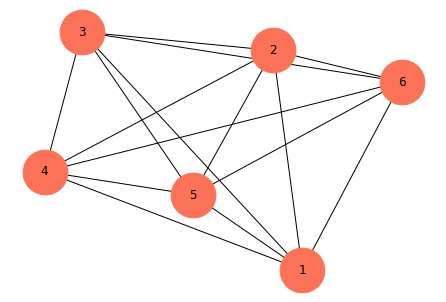

In [8]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 5, 4, 6, 3, 2, 1]
Длина лучшего выбранного маршрута: 18
Длины всех рассмотренных маршрутов: [31, 31, 31, 31, 18]


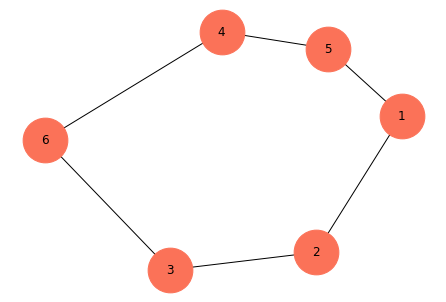

In [9]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)